## Mini proyecto 

### Librerias a utilizar

In [74]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
sns.set() #formato ggplot a las gráficas

Lectura de datos

In [40]:
Train_df = pd.read_csv('./train.csv')
Test_df = pd.read_csv('./test.csv')

In [43]:
# Cambiar el nombre de las columnas a español
Train_df.rename(columns={'obscene':'obscenidad','insult':'insulto','toxic':'toxico','severe_toxic':'severamente_toxico','identity_hate':'discurso_odio','threat':'amenaza'},inplace=True)
Test_df.rename(columns={'obscene':'obscenidad','insult':'insulto','toxic':'toxico','severe_toxic':'severamente_toxico','identity_hate':'discurso_odio','threat':'amenaza'},inplace=True)


In [44]:
# vector con el nombre de las etiquetas
cols_target = ['obscenidad','insulto','toxico','severamente_toxico','discurso_odio','amenaza']

 Los datos de entrenamiento cuentan con una columna de id y comentario para cada mensaje, ademas cada mensaje tiene una columna con un valor binario para indicar si el mensaje fue etiquetado como toxico, severamente_toxico, obsenidad, amenza, insulto o discurso de odio

In [48]:
#crear variables para hacer un poco  de análisis descriptivo
Train_df['numero_etiquetas'] = Train_df[cols_target].sum(axis=1)
Train_df['Longitud_Mensaje'] = Train_df['comment_text'].apply(lambda x: len(str(x)))

[Text(0.5, 1.0, 'Histograma longitud de los mensajes')]

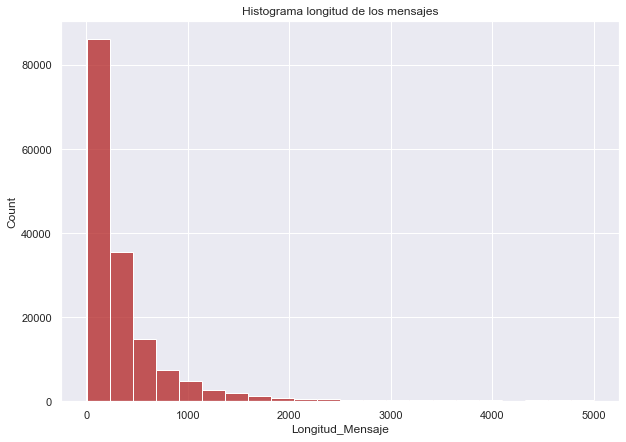

In [66]:

fig = plt.figure(figsize = (10,7))
ax=sns.histplot(data = Train_df, x = 'Longitud_Mensaje',bins=22,color='firebrick')
ax.set( title='Histograma longitud de los mensajes')

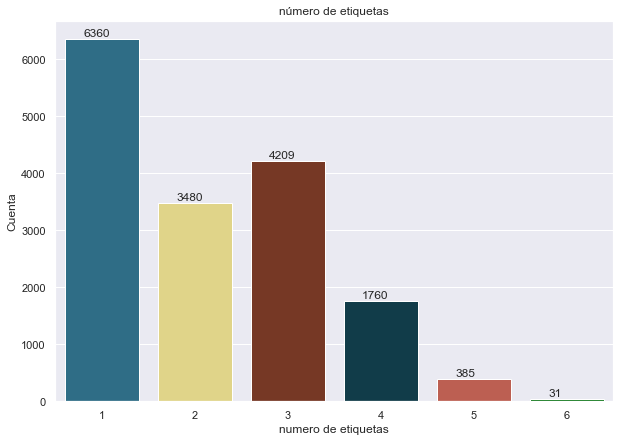

In [58]:

fig = plt.figure(figsize = (10,7))
ax = sns.countplot(data = Train_df[Train_df.numero_etiquetas>0], x = 'numero_etiquetas',
palette=['#207394','#eede7b', '#833118','#084152','#cd5241','#028A0F'])
ax.set( xlabel = "numero de etiquetas", ylabel = "Cuenta",title='número de etiquetas')
for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+50))

In [46]:
Train_df[Train_df.numero_etiquetas >1].head(1)

,id,comment_text,toxico,severamente_toxico,obscenidad,amenaza,insulto,discurso_odio,numero_etiquetas,Longitud_Mensaje
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4,44


Hay mensajes que pueden tener más de una etiqueta o no tener ninguna etiqueta.

In [67]:
Train_df.head(3)

,id,comment_text,toxico,severamente_toxico,obscenidad,amenaza,insulto,discurso_odio,numero_etiquetas,Longitud_Mensaje
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0,0,265
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233


In [69]:
sin_etiqueta = Train_df[(Train_df['toxico']!=1) & (Train_df['severamente_toxico']!=1) & (Train_df['obscenidad']!=1) & 
                            (Train_df['amenaza']!=1) & (Train_df['insulto']!=1) & (Train_df['discurso_odio']!=1)]
print('El Porcentaje de comentario sin etiqueta en el set de entremaniemto es', len(sin_etiqueta)/len(Train_df)*100)

El Porcentaje de comentario sin etiqueta en el set de entremaniemto es 89.83211235124176


In [40]:
# let's see the total rows in train, test data and the numbers for the various categories
print('Se cuentan con ', Train_df.shape[0], ' comentarios en los datos de entrenamiento')
print('Se cuentan con ',Test_df.shape[0], ' comentarios en los datos de testeo')
print(Train_df[cols_target].sum())

Se cuentan con  159571  comentarios en los datos de entrenamiento
Se cuentan con  153164  comentarios en los datos de testeo
obscenidad             8449
insulto                7877
toxico                15294
severamente_toxico     1595
discurso_odio          1405
amenaza                 478
dtype: int64


In [79]:
etiqueta='toxico'
plt.figure(figsize=(4,4))
filtered_data = Train_df[Train_df[etiqueta]==1]
corpus = filtered_data["comment_text"]
result = ""
for sentence in corpus:
    result += sentence + " "
    result = result.lower()



KeyboardInterrupt: 

<Figure size 288x288 with 0 Axes>

In [71]:
for etiqueta in cols_target:
    print(etiqueta)

obscenidad
insulto
toxico
severamente_toxico
discurso_odio
amenaza
